In [ ]:
%pip list

In [ ]:
%pip install tensorflow
%pip install setuptools
%pip install matplotlib pandas

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# With data augmentation

In [3]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
augmentation.fit(X_train)


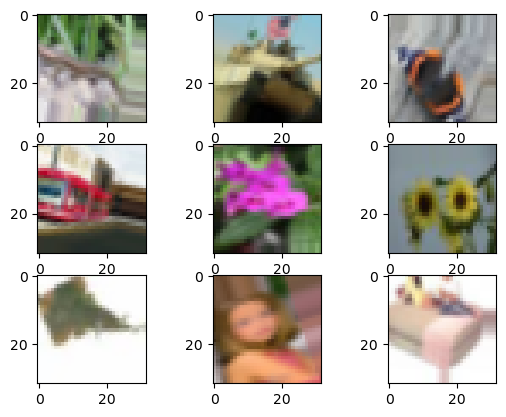

In [22]:
# Display a few augmented images
for X_batch, y_batch in augmentation.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    plt.show()
    break

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100))

c:\Users\cagin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,420 (782.89 KB)

 Trainable params: 200,420 (782.89 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
batch_size = 64
history = model.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=50,
                    validation_data=(X_test, y_test))


Epoch 1/50


c:\Users\cagin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 34ms/step - accuracy: 0.0263 - loss: 4.4428 - val_accuracy: 0.1018 - val_loss: 3.8543
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0312 - loss: 3.9675

c:\Users\cagin\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.0312 - loss: 3.9675 - val_accuracy: 0.1026 - val_loss: 3.8516
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.0839 - loss: 3.9447 - val_accuracy: 0.1547 - val_loss: 3.5625
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.1250 - loss: 3.8759 - val_accuracy: 0.1559 - val_loss: 3.5505
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.1161 - loss: 3.7442 - val_accuracy: 0.1850 - val_loss: 3.3663
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.2031 - loss: 3.4959 - val_accuracy: 0.1843 - val_loss: 3.3746
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.1398 - loss: 3.6137 - val_accuracy: 0.2143 - val_loss: 3.2261
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - accuracy: 0.1875 - loss: 3.2101 - val_accuracy: 0.2147 - val_loss: 3.2243
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.1568 - loss: 3.5297 - val_accurac

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 1s - 2ms/step - accuracy: 0.3227 - loss: 2.6353
Test accuracy: 0.32269999384880066


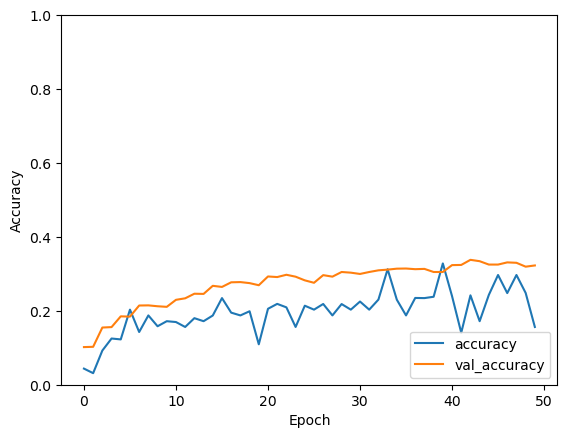

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


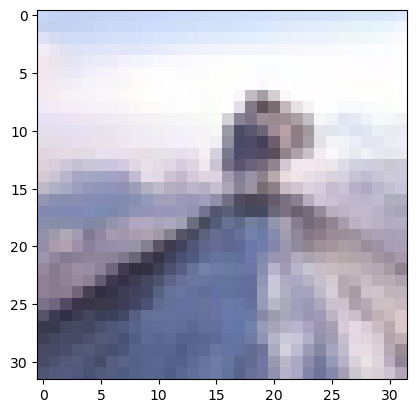

Predicted label: 95, True label: 49


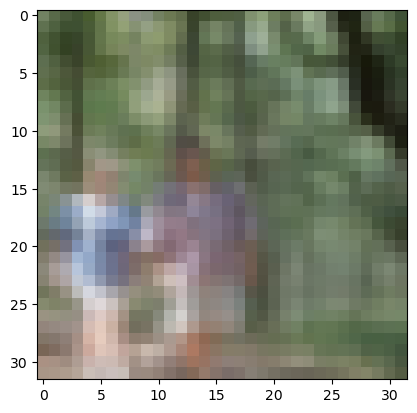

Predicted label: 33, True label: 33


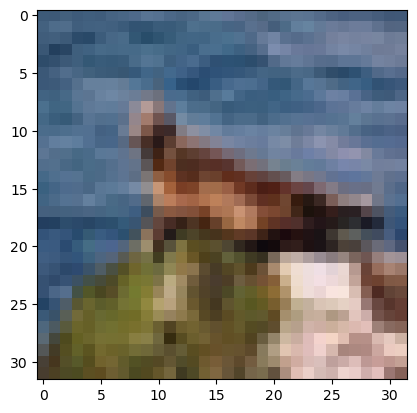

Predicted label: 55, True label: 72


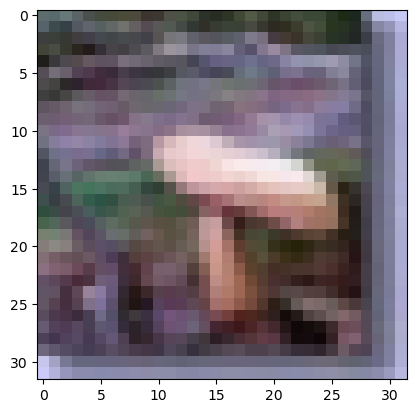

Predicted label: 13, True label: 51


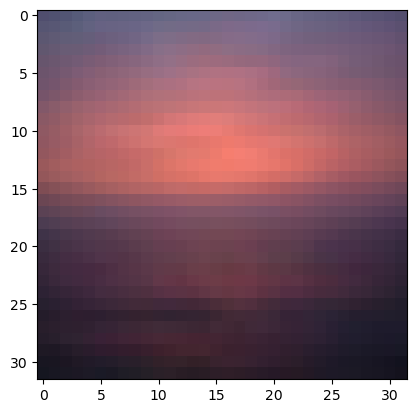

Predicted label: 71, True label: 71


In [12]:
predictions = model.predict(X_test)

# Display the first 5 predictions and their corresponding true labels
for i in range(5):
    plt.imshow(X_test[i])
    plt.show()
    print(f'Predicted label: {np.argmax(predictions[i])}, True label: {y_test[i][0]}')


# Without data augmentation

In [13]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

c:\Users\cagin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100))

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,420 (501.64 KB)

 Trainable params: 128,420 (501.64 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0487 - loss: 4.2681 - val_accuracy: 0.1559 - val_loss: 3.5715
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1698 - loss: 3.4457 - val_accuracy: 0.2177 - val_loss: 3.2324
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2304 - loss: 3.1178 - val_accuracy: 0.2589 - val_loss: 2.9989
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2759 - loss: 2.9029 - val_accuracy: 0.2783 - val_loss: 2.9097
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3051 - loss: 2.7558 - val_accuracy: 0.3053 - val_loss: 2.7857
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3317 - loss: 2.6416 - val_accuracy: 0.3200 - val_loss: 2.7166
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3501 - loss: 2.5487 - val_accuracy: 0.3314 - val_loss: 2.6732
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3677 - loss: 2.4512 - 

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 1s - 2ms/step - accuracy: 0.3555 - loss: 2.5488
Test accuracy: 0.3555000126361847


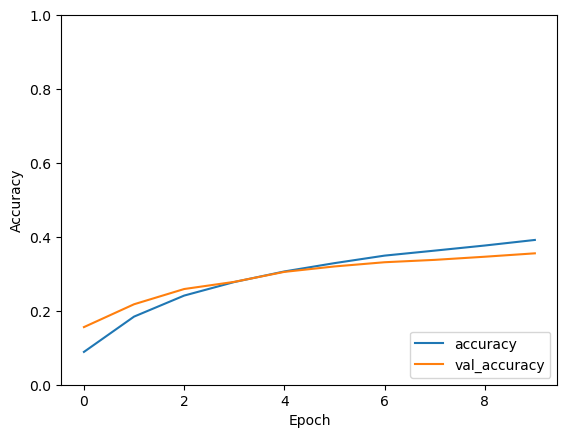

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


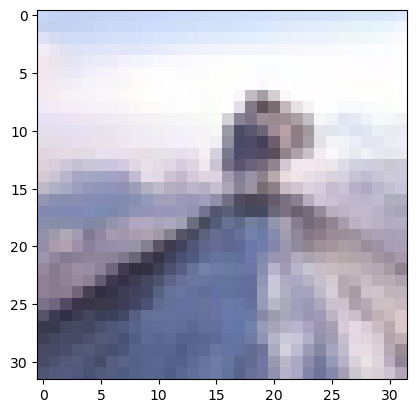

Predicted label: 30, True label: 49


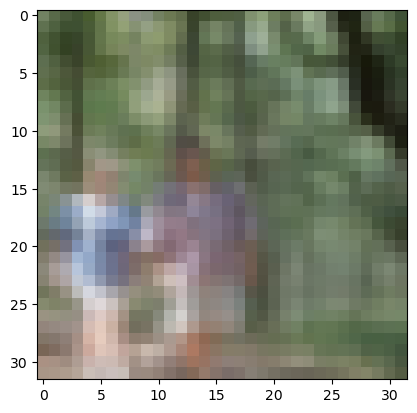

Predicted label: 42, True label: 33


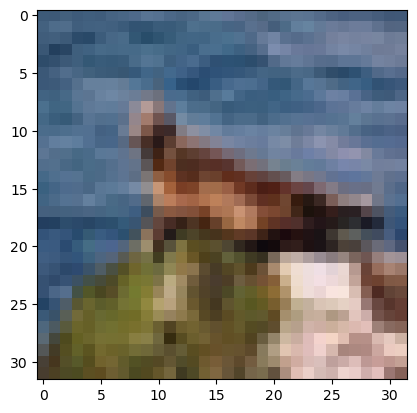

Predicted label: 45, True label: 72


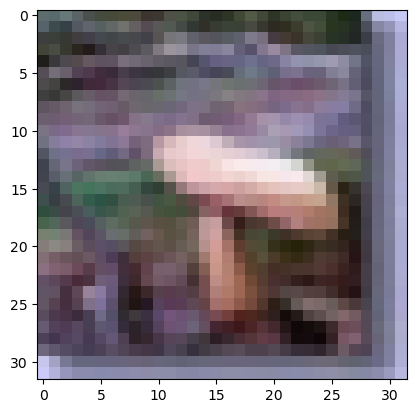

Predicted label: 51, True label: 51


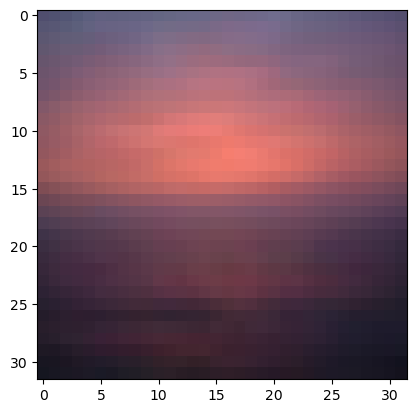

Predicted label: 71, True label: 71


In [21]:
predictions = model.predict(X_test)

# Display the first 5 predictions and their corresponding true labels
for i in range(5):
    plt.imshow(X_test[i])
    plt.show()
    print(f'Predicted label: {np.argmax(predictions[i])}, True label: {y_test[i][0]}')
